,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,EcoSport,2017,10298,Manual,25013,Petrol,150,53.3,1.0
1,Focus,2016,10491,Manual,30970,Diesel,0,74.3,1.5
2,S-MAX,2017,13498,Manual,60200,Diesel,150,56.5,2.0


,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,S-MAX,2016,Manual,23905,Diesel,125,56.5,2.0
1,Fiesta,2018,Manual,16895,Petrol,145,40.3,1.5
2,Kuga,2017,Manual,12109,Petrol,165,45.6,1.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3759 entries, 0 to 3758
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         3759 non-null   object 
 1   year          3759 non-null   int64  
 2   price         3759 non-null   int64  
 3   transmission  3759 non-null   object 
 4   mileage       3759 non-null   int64  
 5   fuelType      3759 non-null   object 
 6   tax           3759 non-null   int64  
 7   mpg           3759 non-null   float64
 8   engineSize    3759 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 264.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1617 entries, 0 to 1616
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         1617 non-null   object 
 1   year          1617 non-null   int64  
 2   transmission  1617 non-null   object 
 3   mileage       1617 non-null   i

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

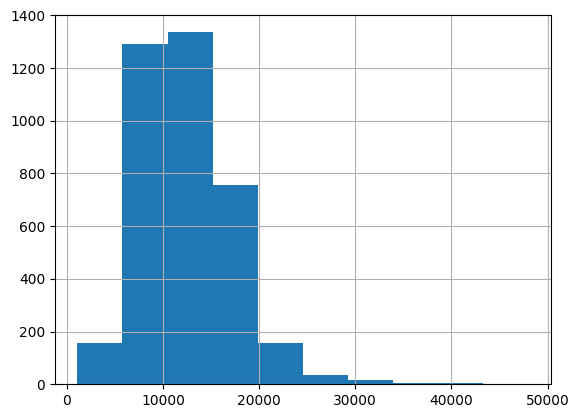

In [22]:
#데이터 불러오기 -EDA
import pandas as pd

train=pd.read_csv("C://Users//sam99//Desktop//컴퓨터공부//빅데이터분석기사//실기//train5.csv")
test=pd.read_csv("C://Users//sam99//Desktop//컴퓨터공부//빅데이터분석기사//실기//test5.csv")

train.shape, test.shape #데이터 크기 확인

display(train.head(3))
display(test.head(3)) #샘플 확인
train.info()

train.describe()

test.info()
test.describe() #기초통계값

train.describe(include='O') #object 타입
test.describe(include='O')

#수동 변속기는 데이터 프레임에 몇 개있나?
test['transmission'].value_counts()
train['price'].hist()
#결측치 확인
display(train.isnull().sum())
display(test.isnull().sum())


#학습하기 전 레이블 타겟 price는 y_train에 옮긴다
y_train = train.pop("price")

#수치형 데이터만 활용해서 학습한다.
cols=['year','mileage', 'tax', 'mpg','engineSize']
train = train[cols]
test = test[cols]

from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(train, y_train, test_size=0.2, random_state=2024)
X_tr.shape, X_val.shape, y_tr.shape, y_val.shape

from sklearn.ensemble import RandomForestRegressor #회귀 모델 사용
rf = RandomForestRegressor()
rf.fit(X_tr, y_tr)
pred = rf.predict(X_val)

from sklearn.metrics import mean_squared_error
def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)**0.5 #싸이킷런에서는 현재 RMSE를 제공하지 않는다. 따라서 MSE를 구하고 0.5승 제곱하여 구한다(root를 씌운다)


In [ ]:
#수치형과 범주형을 함께 활용한다.

import pandas as pd

train=pd.read_csv("C://Users//sam99//Desktop//컴퓨터공부//빅데이터분석기사//실기//train5.csv")
test=pd.read_csv("C://Users//sam99//Desktop//컴퓨터공부//빅데이터분석기사//실기//test5.csv")
y_train = train.pop("price")

train = pd.get_dummies(train)
test = pd.get_dummies(test)

train.shape, test.shape

train.head(2)

from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(train, y_train, test_size=0.2, random_state=2024)
X_tr.shape, X_val.shape, y_tr.shape, y_val.shape

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_tr, y_tr)
pred =rf. predict(X_val)
rmse(y_val, pred)

#Test 예측
pred = rf.predict(test)
#제출 형식: result.csv 컬럼명은 pred id는 별도로 없다 
result= pd.DataFrame({
    'pred':pred
}) 
result.to_csv("result.csv", index= False)

#정수형으로 바꾸는 방법
pred2 = pred.astype(int)
pred2

array([15371, 15659, 14622, ...,  9869, 13755,  5243])